## Improvement of regression model and increase its predictive power. 
### Here are several ways:

- Include additional independent variables: One way to improve the model is to include additional independent variables that may have an impact on the dependent variable. For example, if you are trying to predict the price of a house, you could include variables such as the size of the house, the number of bedrooms, the neighborhood, and so on.

- Transform the dependent variable: Sometimes transforming the dependent variable can improve the fit of the model. For example, if the dependent variable is skewed or has a non-normal distribution, applying a logarithmic or square root transformation may improve the model's fit.

- Remove outliers: Outliers in the data can skew the results of the regression analysis and reduce the accuracy of the model. Removing outliers can improve the fit of the model and increase its predictive power.

- Use a different type of regression: There are several types of regression models, such as logistic regression, polynomial regression, and Ridge regression. Depending on the nature of the data and the research question, using a different type of regression model may improve the fit of the model and increase its predictive power.

- Increase the sample size: A larger sample size can improve the accuracy of the regression model and increase its predictive power. If possible, collecting additional data or expanding the sample size may improve the fit of the model.

In [3]:
# import packages
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
# read custom correct data
mrg = pd.read_excel('results/merged_m.xlsx')
mrg.head(2)

,Rank,Country,Quality_of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Cost_of_Living_Index,Property_Price_to_Income_Ratio,Traffic_Commute_Time_Index,Pollution_Index,Climate_Index,Region
0,1,Netherlands,196.7,107.8,72.7,77.1,68.6,7.2,25.5,23.7,86.8,Western_Europe
1,2,Denmark,194.7,105.0,73.4,79.2,78.6,6.6,28.5,21.3,81.8,Northern_Europe


## Build a model

In [11]:
# extract the columns you need
X = mrg['Cost_of_Living_Index'].values.reshape(-1,1)
y = mrg['Quality_of_Life_Index'].values.reshape(-1,1)
# create a linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# Print the formula and coefficients
from scipy import stats

X1 = mrg['Cost_of_Living_Index']
y1 = mrg['Quality_of_Life_Index']
slope, intercept, r_value, p_value, std_err = stats.linregress(X1, y1)

print('Formula is: y = ', slope.round(1), 'x + ', intercept.round(1))
print('Where y is the Quality of Life Index and x is the Cost of Living Index','\n')
print("r-squared:", (r_value**2*100).round(1))
print("p_value:", p_value)
print("p_value:", std_err)

Formula is: y =  1.4 x +  66.0
Where y is the Quality of Life Index and x is the Cost of Living Index 

r-squared: 51.6
p_value: 1.5086349672093395e-14
p_value: 0.14885345781957787


## Make a plot

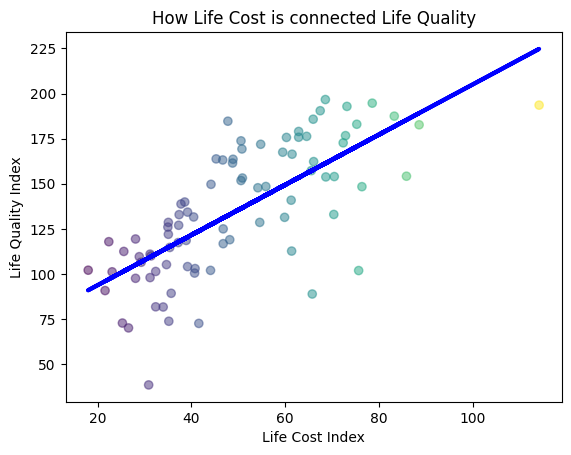

In [13]:
# plot it out
plt.scatter(X, y, c=X, cmap='viridis', alpha=0.5)
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.xlabel('Life Cost Index')
plt.ylabel('Life Quality Index')
plt.title('How Life Cost is connected Life Quality')

plt.savefig('results/LifeCost_vs_LifeQuality.png', dpi=300, bbox_inches='tight')

## Make a prediction

In [14]:
cost = 2400
# in EUR per month
NY_cost_of_living = 4900
lcost_index = cost/NY_cost_of_living*100
lqual_index = regr.predict(lcost_index)[0][0]

print('The predicted life quality index for '
      +str(cost)+' EUR life cost is', str(lqual_index.round(1)))
bins = np.percentile(mrg['Quality_of_Life_Index'], np.arange(0, 101, 10))
new_value_bin = np.digitize(lqual_index, bins) 

d = {
  10: "top 10% best",
  9: "top 20% best",
  8: "top 30% best",
  7: "40% best",
  6: "50% best",
  5: "50% worst",
  4: "40% worst",
  3: "top 30% worst",
  2: "top 20% worst",
  1: "top 10% worst"
}

print(f'This index refers to the {d[new_value_bin]} countries in terms of standard of living','\n')
print('REMEMBER! r2=0.51 for this model. That means the model has quite low predictive power.')

The predicted life quality index for 2400 EUR life cost is 134.1
This index refers to the 50% best countries in terms of standard of living 

REMEMBER! r2=0.51 for this model. That means the model has quite low predictive power.
